In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns  # prettier plots
import numpy as np

- https://arxiv.org/abs/1703.03864
- https://blog.openai.com/evolution-strategies/
- https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d
- http://www.jmlr.org/papers/volume15/wierstra14a/wierstra14a.pdf

In [38]:
# Minimize a solution around some solution point
solution = np.array([0.5, 0.1, -0.3])

# objective function
def f(w):
    return -np.sum((w - solution) ** 2)

npop = 50  # population size
sigma = 0.1  # noise standard deviation
alpha = 0.001  # learning rate

no_iterations = 300

def run(no_iterations, verbose=True):
    output_format = 'Iteration {:>4}: [{w[0]:.4f}, {w[0]:.4f}, {w[0]:.4f}]'
    
    # Collect the values of w
    ws = []
    
    # Initialize randomly
    w = np.random.randn(3)
    ws.append(w)
    if verbose:
        print(output_format.format(0, w=w))
    
    for i in range(no_iterations):
        N = np.random.randn(npop, 3)
        R = np.zeros(npop)

        for j in range(npop):
            # Create a candidate w to try
            w_try = w + sigma * N[j]
            
            # Try the candidate
            R[j] = f(w_try)

        A = (R - np.mean(R)) / np.std(R)
        w = w + alpha / (npop * sigma) * np.dot(N.T, A)
        ws.append(w)
        if verbose:
            print(output_format.format(i + 1, w=w))
            
    return ws

In [40]:
ws = run(no_iterations)

Iteration    0: [2.3761, 2.3761, 2.3761]
Iteration    1: [2.3686, 2.3686, 2.3686]
Iteration    2: [2.3615, 2.3615, 2.3615]
Iteration    3: [2.3519, 2.3519, 2.3519]
Iteration    4: [2.3423, 2.3423, 2.3423]
Iteration    5: [2.3331, 2.3331, 2.3331]
Iteration    6: [2.3250, 2.3250, 2.3250]
Iteration    7: [2.3172, 2.3172, 2.3172]
Iteration    8: [2.3098, 2.3098, 2.3098]
Iteration    9: [2.3000, 2.3000, 2.3000]
Iteration   10: [2.2919, 2.2919, 2.2919]
Iteration   11: [2.2839, 2.2839, 2.2839]
Iteration   12: [2.2739, 2.2739, 2.2739]
Iteration   13: [2.2661, 2.2661, 2.2661]
Iteration   14: [2.2580, 2.2580, 2.2580]
Iteration   15: [2.2494, 2.2494, 2.2494]
Iteration   16: [2.2419, 2.2419, 2.2419]
Iteration   17: [2.2339, 2.2339, 2.2339]
Iteration   18: [2.2233, 2.2233, 2.2233]
Iteration   19: [2.2169, 2.2169, 2.2169]
Iteration   20: [2.2075, 2.2075, 2.2075]
Iteration   21: [2.1979, 2.1979, 2.1979]
Iteration   22: [2.1896, 2.1896, 2.1896]
Iteration   23: [2.1792, 2.1792, 2.1792]
Iteration   24: 

In [42]:
def plot_weights(ws):
    ax = plt.plot(ws);
    plt.xlabel('Iteration')
    plt.ylabel('Weight');

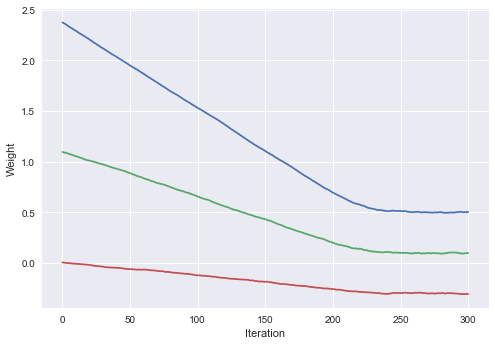

In [43]:
plot_weights(ws)

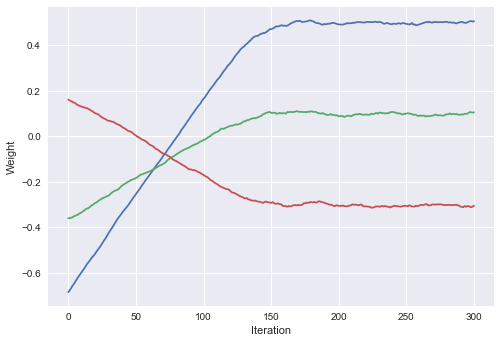

In [44]:
ws = run(no_iterations, verbose=False)
plot_weights(ws)

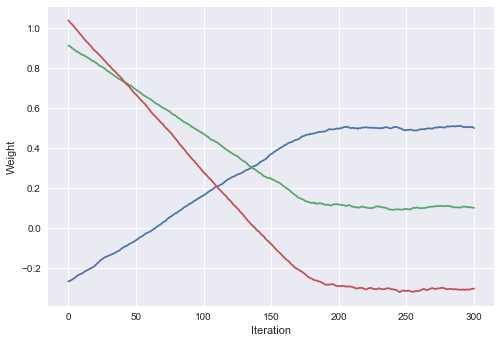

In [45]:
ws = run(no_iterations, verbose=False)
plot_weights(ws)